# 构建自己的模型

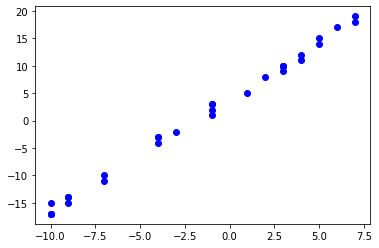

In [1]:

import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)

y_train = [w * x + b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_train, 'bo')

In [2]:

import torch
from torch import nn

class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias


## nn.Module 模块

模块本身是 callable 的，当调用它的时候，就是执行 forward 函数，也就是前向传播。



In [ ]:

model = LinearModel()
x = torch.tensor(3)
y = model(x)

# 模型的训练

In [4]:

model = LinearModel()
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = `model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()

In [5]:

for parameter in model.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([2.0043], requires_grad=True))
('bias', Parameter containing:
tensor([3.3345], requires_grad=True))


In [6]:

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1_1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding='same')
    self.conv1_2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, padding='same')
    ...
    self.conv_m_1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding='same')
    self.conv_m_2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, padding='same')
    ...
    self.conv_n_1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding='same')
    self.conv_n_2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, padding='same')

  def forward(self, input):
    x = self.conv1_1(input)
    x = self.conv1_2(x)
    ...
    x = self.conv_m_1(x)
    x = self.conv_m_2(x)
    ...    
    x = self.conv_n_1(x)
    x = self.conv_n_2(x)
    ...
    return x

In [7]:

class CustomLayer(nn.Module):
  def __init__(self, input_channels, output_channels):
    super().__init__()
    self.conv1_1 = nn.Conv2d(in_channels=input_channels, out_channels=3, kernel_size=3, padding='same')
    self.conv1_2 = nn.Conv2d(in_channels=3, out_channels=output_channels, kernel_size=2, padding='same')
    
  def forward(self, input):
    x = self.conv1_1(input)
    x = self.conv1_2(x)
    return x
    

In [8]:

class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = CustomLayer(1，1)
    ...
    self.layerm = CustomLayer(1，1)
    ...
    self.layern = CustomLayer(1，1)
  
  def forward(self, input):
    x = self.layer1(input)
    ...
    x = self.layerm(x)
    ...    
    x = self.layern(x)
    ...
    return x

SyntaxError: invalid character in identifier (449040411.py, line 4)

# 模型保存与加载

## 方式一：只保存训练好的参数

In [9]:

torch.save(model.state_dict(), './linear_model.pth')

In [10]:
model.state_dict()

OrderedDict([('weight', tensor([2.0043])), ('bias', tensor([3.3345]))])

In [12]:

# 先定义网络结构
linear_model = LinearModel()
# 加载保存的参数
linear_model.load_state_dict(torch.load('./linear_model.pth'))
linear_model.eval()
for parameter in linear_model.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([2.0043], requires_grad=True))
('bias', Parameter containing:
tensor([3.3345], requires_grad=True))


## 方式二：保存网络结构与参数

In [13]:

# 保存整个模型
torch.save(model, './linear_model_with_arc.pth')
# 加载模型，不需要创建网络了
linear_model_2 = torch.load('./linear_model_with_arc.pth')
linear_model_2.eval()
for parameter in linear_model_2.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([2.0043], requires_grad=True))
('bias', Parameter containing:
tensor([3.3345], requires_grad=True))


# 使用 Torchvison 中的模型进行训练

## 再说微调

In [14]:

import torchvision.modelb as models
alexnet = models.alexnet(pretrained=True)

/home/yc/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/yc/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/yc/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100.0%


In [16]:
!cp /home/yc/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth  ./model

In [20]:
import torchvision.models as models
alexnet = models.alexnet()
alexnet.load_state_dict(torch.load('./model/alexnet-owt-7be5be79.pth'))

<All keys matched successfully>

# 小结

# 每日一练

# QA

# todo